In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit
from models import *
import os

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
PS = pd.read_pickle('../Parametrisation/feature_data/all_param.pkl')
nb_param = 7
nb_band = 5

PS.loc[PS['target']!=90,'target'] = 0
ego = PS.iloc[:,2:].copy()

col_list = []
for i in range(nb_band):
    for j in range(nb_param):
        col_list.append(j+i*(nb_param+3))
        
ego = ego.iloc[:,40:47]
#ego = ego.iloc[:,32:37]
#PS['p3_5'].argmax()
ego


,p1_5,p2_5,p3_5,p4_5,p5_5,p6_5,shift_5
0,0.225303,0.000221,0.000849,-47.001433,0.963865,0.093504,-0.020745
1,0.037064,-0.007739,-0.005209,-259.422507,1.738856,0.442337,-0.238119
2,0.005902,0.236480,6.111213,-47.125805,0.480986,0.070124,-0.395932
3,0.000926,-0.003926,2.006910,156.582960,-23.097208,-0.039845,-0.223779
4,0.042896,0.002318,0.014228,-43.559717,1.243892,0.249134,-0.246108
...,...,...,...,...,...,...,...
3995,0.026054,0.001851,0.067806,-24.887436,0.385175,0.028434,-0.417771
3996,0.081256,32.184298,-517.694403,-42.667586,0.137174,0.121252,-0.682664
3997,0.147498,-0.009479,0.238405,-39.327897,0.725158,0.129686,-0.318653
3998,0.005576,-0.008991,1.057726,-31.325623,0.985005,0.004779,-0.362618


In [6]:
X_train, X_test, y_train, y_test = train_test_split(ego, PS['target'], test_size=0.20, random_state=42)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

(clf.predict(X_test)==y_test).sum()/len(y_test)

0.9725

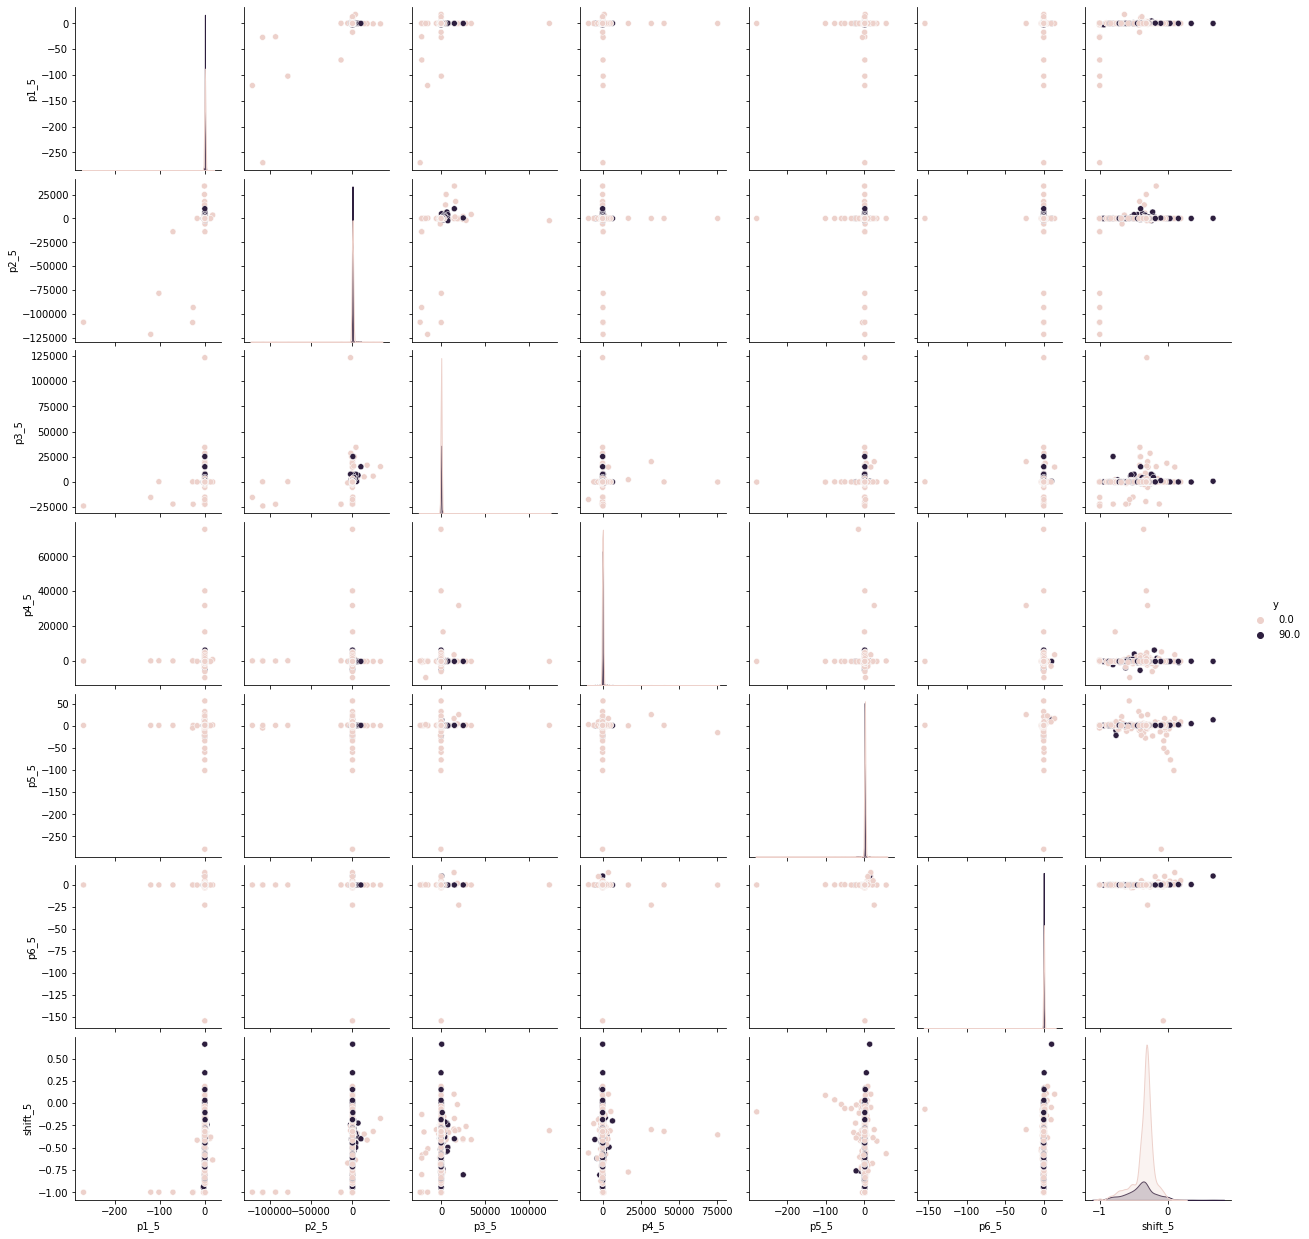

In [7]:
df = ego.copy()
df['y'] = PS['target']

g = sns.pairplot(df,hue='y')

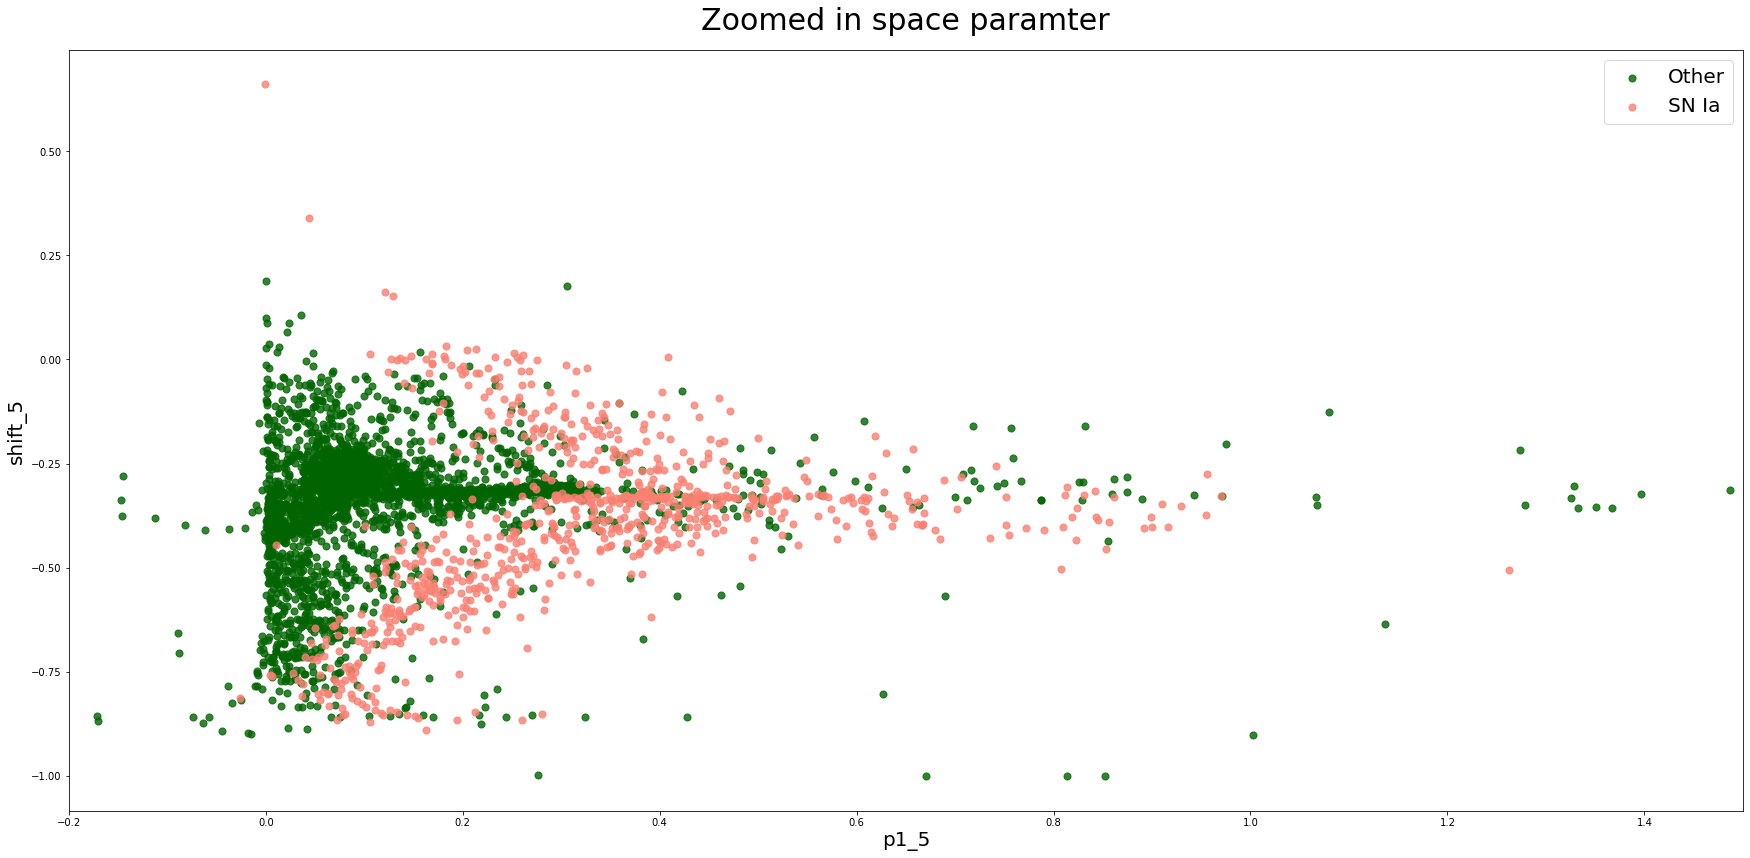

In [139]:
cdict = {0: 'darkgreen', 90: 'salmon'}
obdict = {0 : 'Other', 90 : 'SN Ia'}


fig, ax = plt.subplots(figsize=(30,14))
for g in np.unique(PS['target']):
    ix = np.where(PS['target'] == g)
    ax.scatter(np.array(ego['p1_5'])[ix], np.array(ego['shift_5'])[ix], c = cdict[g], label = obdict[g], s = 50, alpha = 0.8)
    
ax.legend(fontsize=20)


plt.title('Zoomed in space paramter',fontsize = 30, pad=20)
plt.xlim(-0.2,1.5)
plt.xlabel('p1_5',fontsize = 20)
plt.ylabel('shift_5',fontsize = 20)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(ego)
plt.scatter(pca.transform(ego)[:,0],pca.transform(ego)[:,1],c =PS['target'])